In [1]:
# Basic libraries for data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Machine learning preprocessing libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_validate


from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer  # Required for IterativeImputer
from sklearn.impute import IterativeImputer  # For MICE implementation

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.feature_selection import RFECV

# Imbalanced data handling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Metrics for evaluation
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                            roc_auc_score, confusion_matrix, classification_report,
                            roc_curve, precision_recall_curve, auc,ConfusionMatrixDisplay)

# Model interpretation
import shap

# Utilities
import os
import time
import joblib
from datetime import datetime
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

In [2]:
# Step 1: Load the dataset
file_path = r"/Users/jayendra/Documents/alzheimers_prediction_dataset.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Print the first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Print dataset info
print("\nDataset information:")
print(df.info())



First 5 rows of the dataset:
        Country  Age  Gender  Education Level   BMI Physical Activity Level  \
0         Spain   90    Male                1  33.0                  Medium   
1     Argentina   72    Male                7  29.9                  Medium   
2  South Africa   86  Female               19  22.9                    High   
3         China   53    Male               17  31.2                     Low   
4        Sweden   58  Female                3  30.0                    High   

  Smoking Status Alcohol Consumption Diabetes Hypertension  ...  \
0          Never        Occasionally       No           No  ...   
1         Former               Never       No           No  ...   
2        Current        Occasionally       No          Yes  ...   
3          Never           Regularly      Yes           No  ...   
4         Former               Never      Yes           No  ...   

  Dietary Habits Air Pollution Exposure  Employment Status Marital Status  \
0        Healthy

In [3]:
# Step 2: Identify missing values and duplicates

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# Remove duplicates if any exist
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows")
    print(f"New dataset shape: {df.shape}")


Missing values per column:
Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban 

In [4]:
# Generate statistical summary for numerical columns
print("\nStatistical Summary for Numerical Columns:")
print(df.describe())


Statistical Summary for Numerical Columns:
                Age  Education Level           BMI  Cognitive Test Score
count  74283.000000     74283.000000  74283.000000          74283.000000
mean      71.964703         9.487514     26.780639             64.654241
std       12.980748         5.757020      4.764679             20.153247
min       50.000000         0.000000     18.500000             30.000000
25%       61.000000         4.000000     22.700000             47.000000
50%       72.000000         9.000000     26.800000             65.000000
75%       83.000000        14.000000     30.900000             82.000000
max       94.000000        19.000000     35.000000             99.000000


In [5]:
# First, let's check the exact column names in your dataset
print("Column names in the dataset:")
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")

# Fix for the histplot - using column index approach
plt.figure(figsize=(10, 6))
target_column = df.columns[-1]  # Assuming target is the last column
print(f"Using target column: {target_column}")

Column names in the dataset:
0: Country
1: Age
2: Gender
3: Education Level
4: BMI
5: Physical Activity Level
6: Smoking Status
7: Alcohol Consumption
8: Diabetes
9: Hypertension
10: Cholesterol Level
11: Family History of Alzheimer’s
12: Cognitive Test Score
13: Depression Level
14: Sleep Quality
15: Dietary Habits
16: Air Pollution Exposure
17: Employment Status
18: Marital Status
19: Genetic Risk Factor (APOE-ε4 allele)
20: Social Engagement Level
21: Income Level
22: Stress Levels
23: Urban vs Rural Living
24: Alzheimer’s Diagnosis
Using target column: Alzheimer’s Diagnosis


<Figure size 1000x600 with 0 Axes>

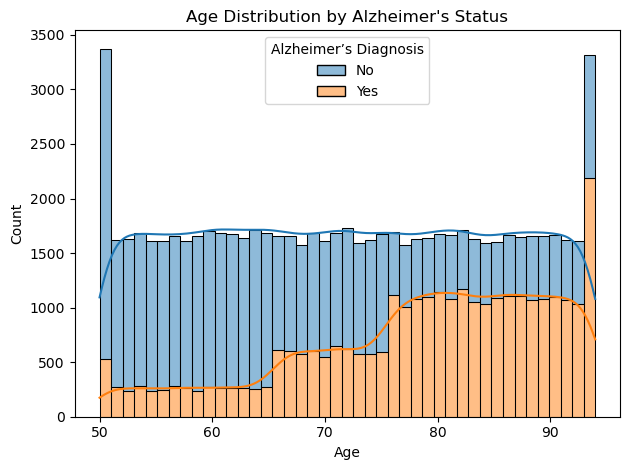

In [6]:
# Create age distribution by target variable
sns.histplot(data=df, x='Age', hue=target_column, kde=True, multiple='stack')
plt.title('Age Distribution by Alzheimer\'s Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('age_by_alzheimers.png')
plt.show()

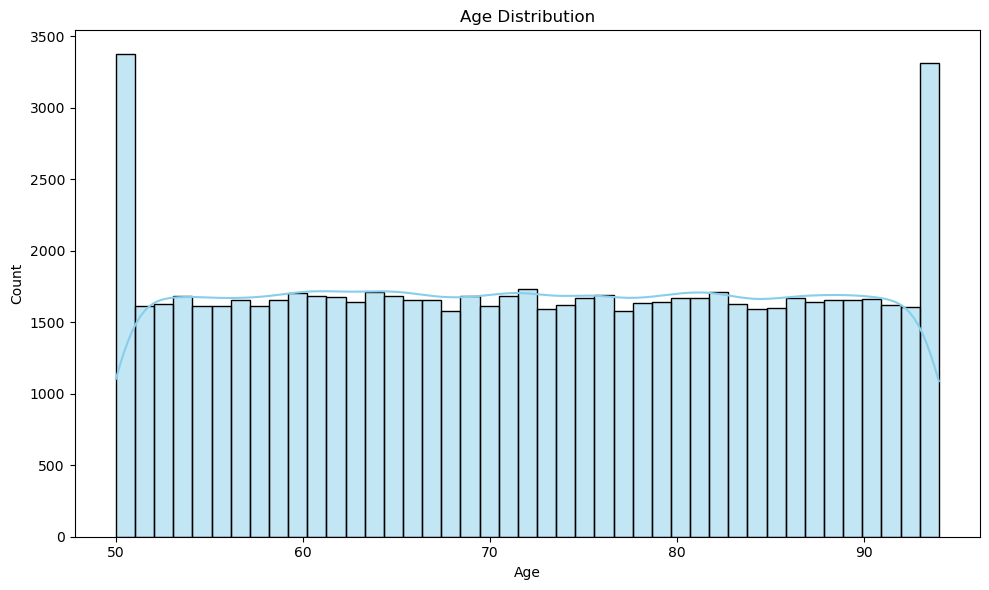

In [7]:
# 1. Age distribution 
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('age_distribution.png')
plt.show()

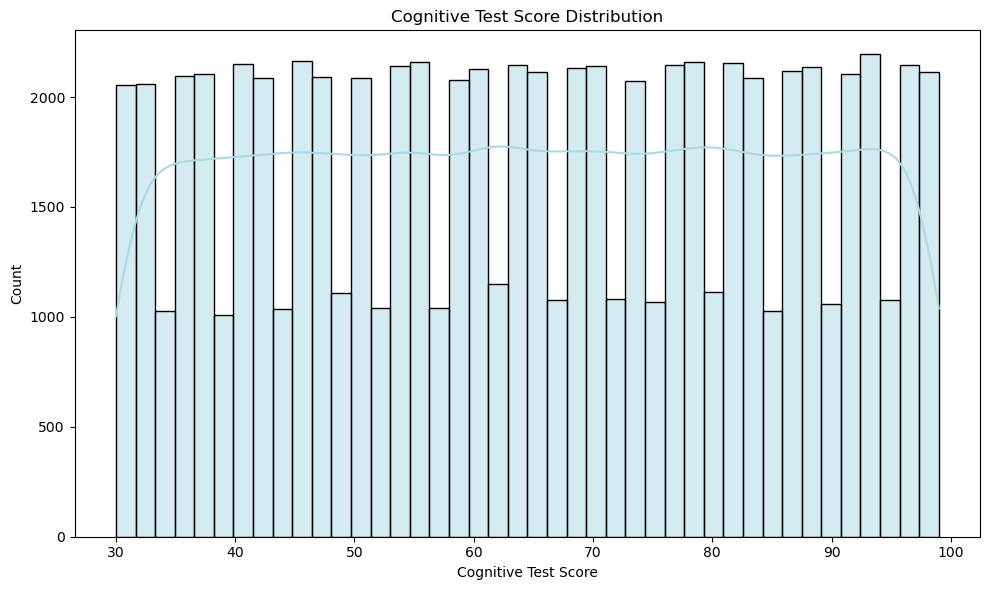

In [8]:
# 2. Cognitive Test Score distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Cognitive Test Score', kde=True, color='lightblue')
plt.title('Cognitive Test Score Distribution')
plt.xlabel('Cognitive Test Score')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('cognitive_score_distribution.png')
plt.show()

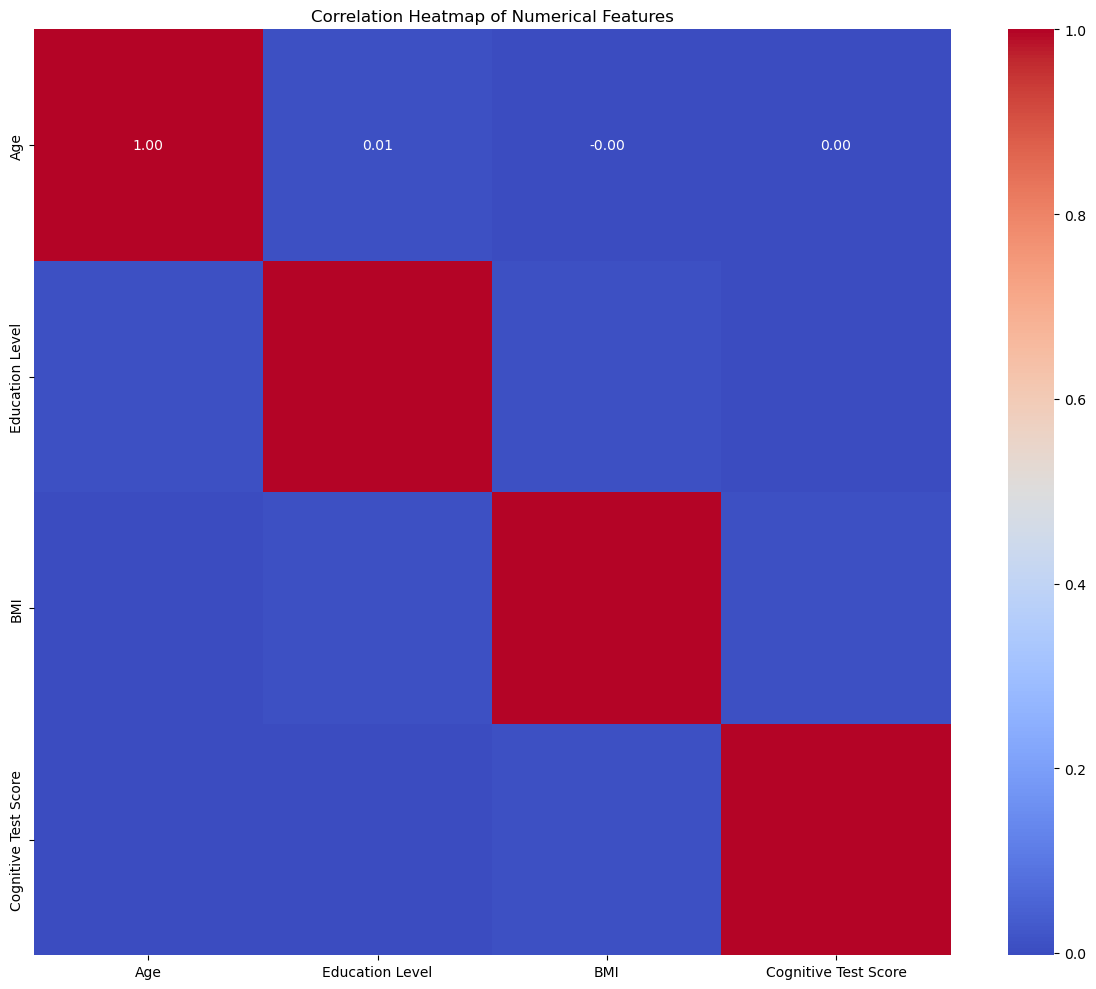

In [9]:
# 3. Correlation heatmap - using numeric columns only
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

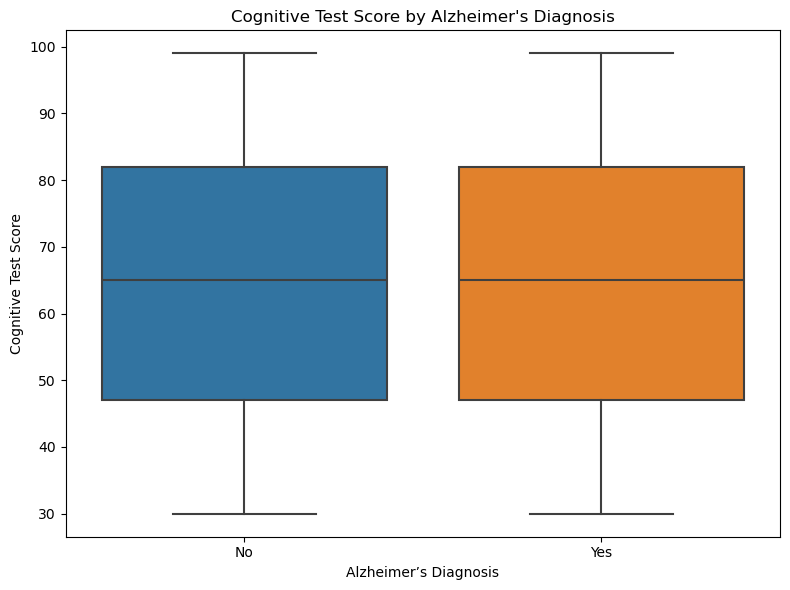

In [10]:
# 4. Box plot of Cognitive Score by Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x=target_column, y='Cognitive Test Score')
plt.title('Cognitive Test Score by Alzheimer\'s Diagnosis')
plt.tight_layout()
plt.savefig('cognitive_boxplot.png')
plt.show()

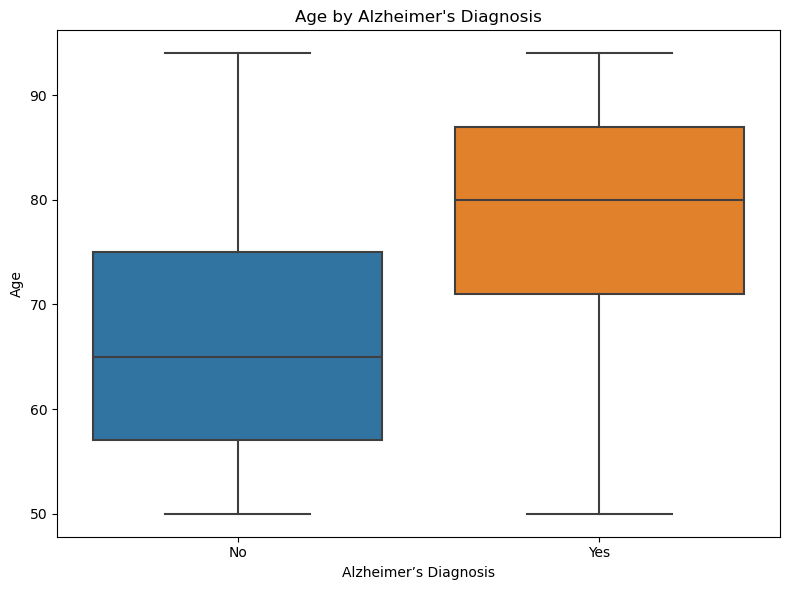

In [11]:
# 5. Boxplot of Age by Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x=target_column, y='Age')
plt.title('Age by Alzheimer\'s Diagnosis')
plt.tight_layout()
plt.savefig('age_boxplot.png')
plt.show()


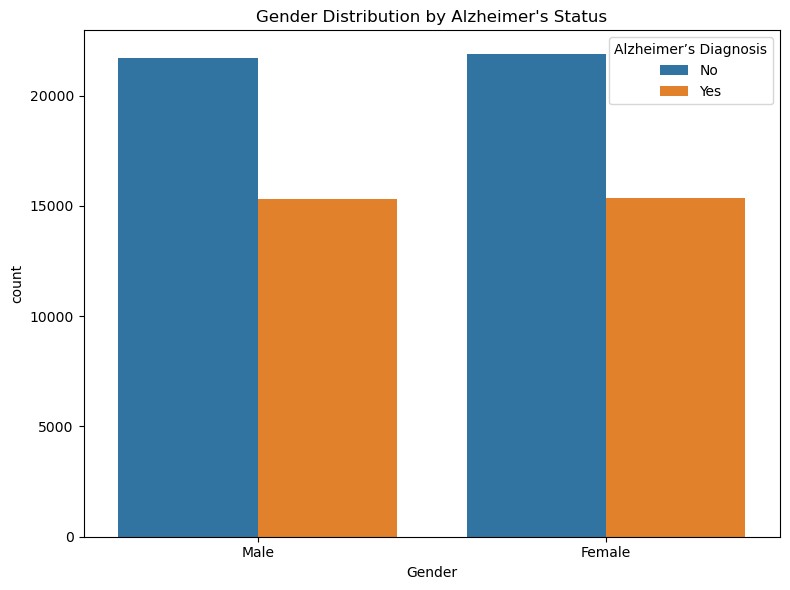

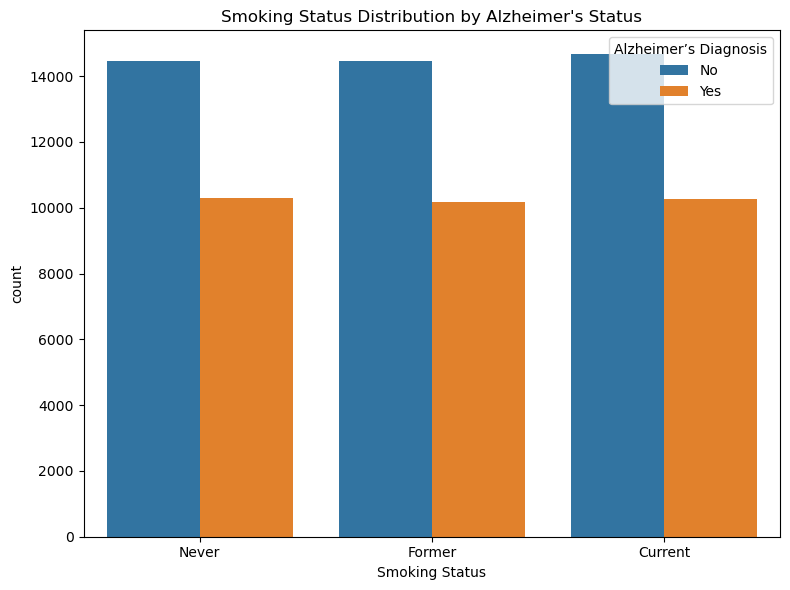

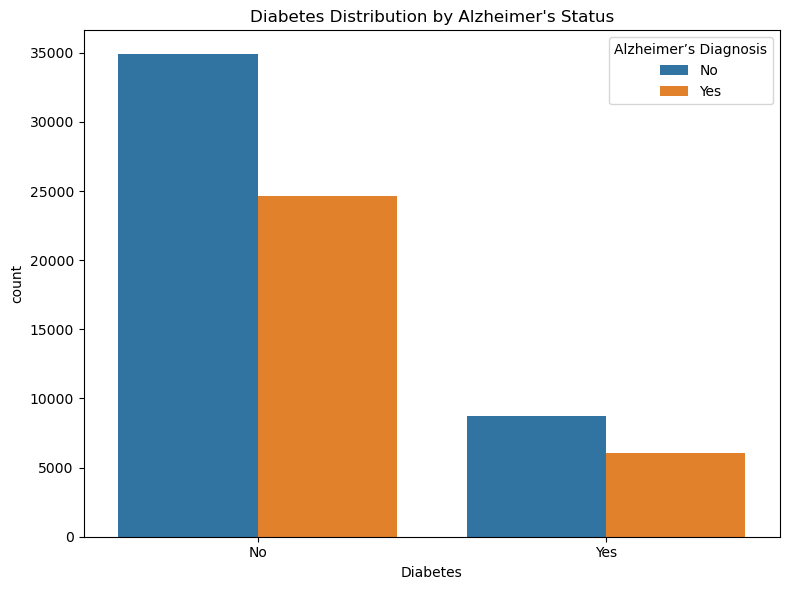

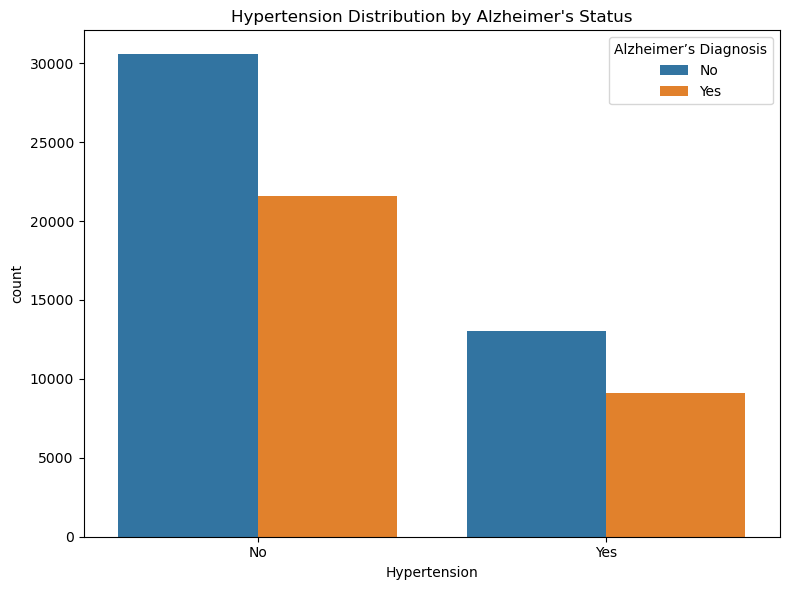

In [12]:
# Count plots for key categorical variables
categorical_vars = ['Gender', 'Smoking Status', 'Diabetes', 'Hypertension']
for var in categorical_vars:
    if var in df.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=var, hue=target_column)
        plt.title(f'{var} Distribution by Alzheimer\'s Status')
        plt.tight_layout()
        plt.savefig(f'{var.lower().replace(" ", "_")}_distribution.png')
        plt.show()

In [13]:
# Feature Engineering and Balancing

print("\n" + "="*50)
print("FEATURE ENGINEERING AND BALANCING")
print("="*50)

# Step 5.1: Separate features and target
target_column = df.columns[-1]  # Assuming target is the last column
X = df.drop(columns=[target_column])
y = df[target_column]

print(f"Target column: {target_column}")
print(f"Features shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts()}")


FEATURE ENGINEERING AND BALANCING
Target column: Alzheimer’s Diagnosis
Features shape: (74283, 24)
Target distribution:
Alzheimer’s Diagnosis
No     43570
Yes    30713
Name: count, dtype: int64


In [14]:
# Step 5: Feature Engineering and Target Definition
print("\n" + "="*50)
print("FEATURE ENGINEERING AND TARGET DEFINITION")
print("="*50)

# Separate features and target
target_column = df.columns[-1]  # Assuming target is the last column
X = df.drop(columns=[target_column])
y = df[target_column]

print(f"Target column: {target_column}")
print(f"Features shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts()}")


FEATURE ENGINEERING AND TARGET DEFINITION
Target column: Alzheimer’s Diagnosis
Features shape: (74283, 24)
Target distribution:
Alzheimer’s Diagnosis
No     43570
Yes    30713
Name: count, dtype: int64


In [15]:


# Step 6.1: Define preprocessing pipeline
print("\n" + "="*50)
print("PREPROCESSING PIPELINE")
print("="*50)
print("\nBuilding preprocessing pipeline...")

# Assuming X and y are already defined
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

# Create preprocessing steps for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(random_state=42)),  # MICE imputation
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Apply preprocessing to the entire dataset
print("\nPreprocessing the entire dataset...")
X_preprocessed = preprocessor.fit_transform(X)
print(f"Preprocessed data shape: {X_preprocessed.shape}")

# Define cross-validation strategy and helper functions
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to display cross-validation results
def display_cv_results(cv_results, model_name):
    print(f"\n{'-'*10} {model_name} Cross-Validation Results {'-'*10}")
    print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.4f} (±{cv_results['test_accuracy'].std():.4f})")
    print(f"Mean Precision: {cv_results['test_precision'].mean():.4f} (±{cv_results['test_precision'].std():.4f})")
    print(f"Mean Recall: {cv_results['test_recall'].mean():.4f} (±{cv_results['test_recall'].std():.4f})")
    print(f"Mean F1 Score: {cv_results['test_f1'].mean():.4f} (±{cv_results['test_f1'].std():.4f})")
    print(f"Mean ROC-AUC: {cv_results['test_roc_auc'].mean():.4f} (±{cv_results['test_roc_auc'].std():.4f})")

# Function to save models
def save_model(model, model_name):
    model_filename = f"{model_name.lower().replace(' ', '_')}_model.pkl"
    joblib.dump(model, model_filename)
    print(f"Model saved as: {model_filename}")

# Define scoring metrics for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Dictionary to store model results
model_results = {}
best_models = {}

print("\nPreprocessing pipeline and evaluation functions successfully defined!")
print("Ready to train and evaluate models.")


PREPROCESSING PIPELINE

Building preprocessing pipeline...
Numerical columns: ['Age', 'Education Level', 'BMI', 'Cognitive Test Score']
Categorical columns: ['Country', 'Gender', 'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption', 'Diabetes', 'Hypertension', 'Cholesterol Level', 'Family History of Alzheimer’s', 'Depression Level', 'Sleep Quality', 'Dietary Habits', 'Air Pollution Exposure', 'Employment Status', 'Marital Status', 'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level', 'Income Level', 'Stress Levels', 'Urban vs Rural Living']

Preprocessing the entire dataset...
Preprocessed data shape: (74283, 74)

Preprocessing pipeline and evaluation functions successfully defined!
Ready to train and evaluate models.



                              LOGISTIC REGRESSION MODEL

Implementing Logistic Regression model with hyperparameter tuning...

Target variable values: ['No' 'Yes']
Target is categorical. Using 'Yes' as the positive class.

Hyperparameter search space:
  - C: Controls regularization strength (lower values = stronger regularization)
  - penalty: L1 regularization can perform feature selection, L2 handles correlated features better
  - solver: Algorithm used for optimization (liblinear works well with L1 and small datasets)
  - class_weight: Adjusts weights inversely proportional to class frequencies when 'balanced'

Performing grid search with 5-fold cross-validation...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Grid search completed in 46.37 seconds (0.77 minutes)

Best Logistic Regression parameters:
  - C: 0.1
  - class_weight: balanced
  - penalty: l1
  - solver: liblinear

Top 5 parameter combinations by performance:
  Rank 5: ROC-AUC = 0.7904 ± 0.0037 with {'C'

<Figure size 1000x800 with 0 Axes>

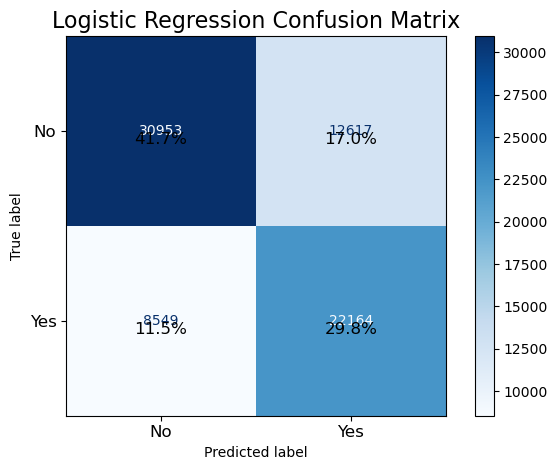

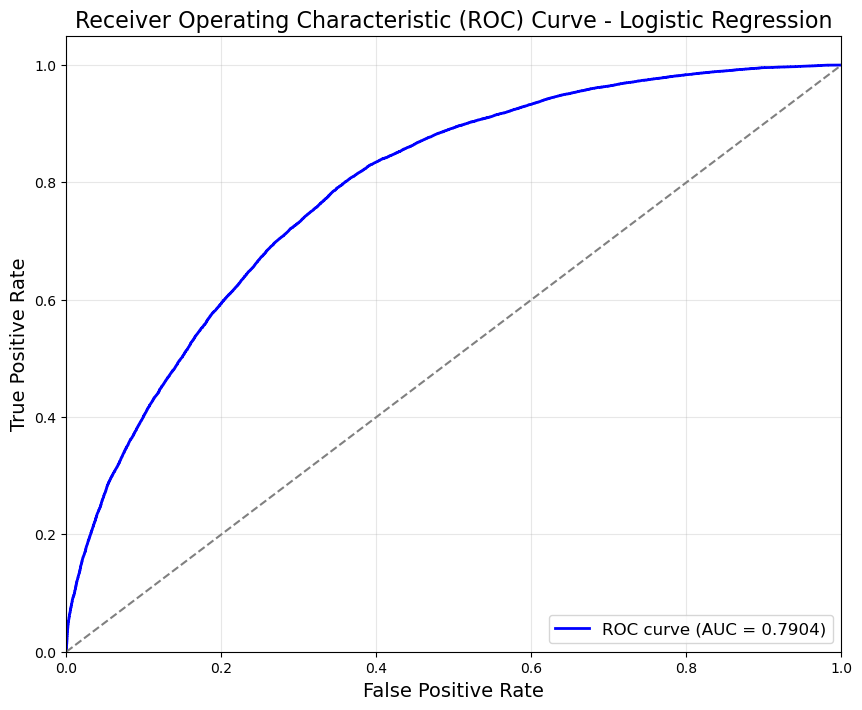

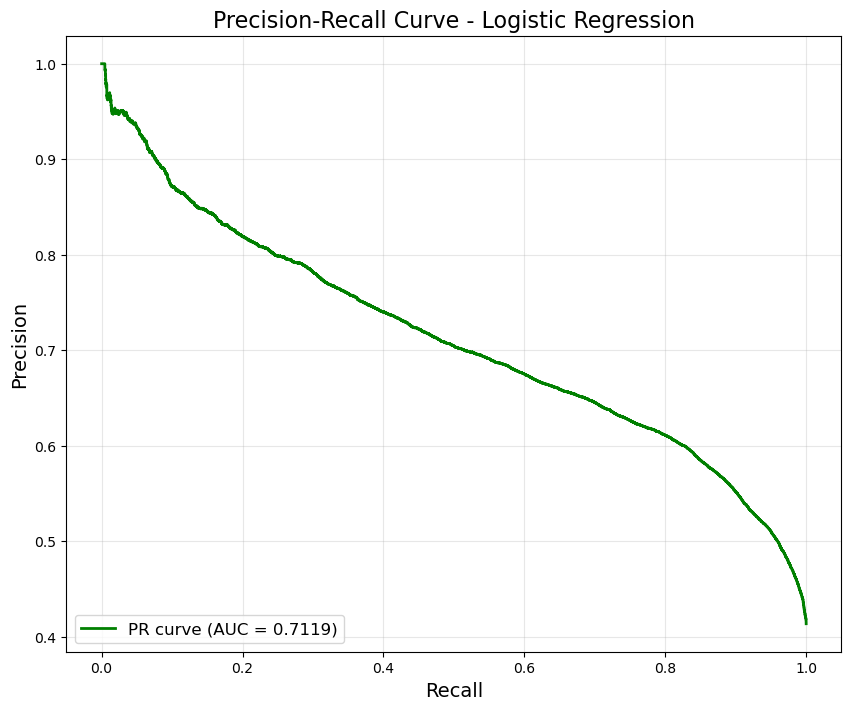

In [16]:
# Step 6.2: Logistic Regression Model

print("\n" + "="*80)
print(" "*30 + "LOGISTIC REGRESSION MODEL")
print("="*80)
print("\nImplementing Logistic Regression model with hyperparameter tuning...")

# Check the target variable's format
unique_values = np.unique(y)
print(f"\nTarget variable values: {unique_values}")

# Define positive label based on target variable format
if 'Yes' in unique_values:
    pos_label = 'Yes'
    neg_label = 'No'
    print(f"Target is categorical. Using '{pos_label}' as the positive class.")
else:
    pos_label = 1
    neg_label = 0
    print(f"Target is numeric. Using {pos_label} as the positive class.")

# Define Logistic Regression model and hyperparameters for grid search
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength (inverse)
    'penalty': ['l1', 'l2'],        # Regularization type
    'solver': ['liblinear'],        # Algorithm to use
    'class_weight': ['balanced', None]  # Class weighting strategy
}

# Detailed explanation of hyperparameters
print("\nHyperparameter search space:")
print("  - C: Controls regularization strength (lower values = stronger regularization)")
print("  - penalty: L1 regularization can perform feature selection, L2 handles correlated features better")
print("  - solver: Algorithm used for optimization (liblinear works well with L1 and small datasets)")
print("  - class_weight: Adjusts weights inversely proportional to class frequencies when 'balanced'")

# Grid search for Logistic Regression
print("\nPerforming grid search with 5-fold cross-validation...")
log_reg_grid = GridSearchCV(
    estimator=log_reg,
    param_grid=log_reg_params,
    cv=cv,
    scoring='roc_auc',  # Optimize for area under ROC curve
    n_jobs=-1,          # Use all available processors
    verbose=1,
    return_train_score=True  # Store training scores for analysis
)

# Timing the grid search process
start_time = time.time()
log_reg_grid.fit(X_preprocessed, y)
search_time = time.time() - start_time
print(f"\nGrid search completed in {search_time:.2f} seconds ({search_time/60:.2f} minutes)")

# Get best Logistic Regression model and parameters
best_log_reg = log_reg_grid.best_estimator_
best_params = log_reg_grid.best_params_
print("\nBest Logistic Regression parameters:")
for param, value in best_params.items():
    print(f"  - {param}: {value}")

# Analyze grid search results
print("\nTop 5 parameter combinations by performance:")
grid_results = pd.DataFrame(log_reg_grid.cv_results_)
top_results = grid_results.sort_values('mean_test_score', ascending=False).head(5)
for i, row in top_results.iterrows():
    params = {k.replace('param_', ''): v for k, v in row.items() if k.startswith('param_') and not pd.isna(v)}
    print(f"  Rank {i+1}: ROC-AUC = {row['mean_test_score']:.4f} ± {row['std_test_score']:.4f} with {params}")

# Cross-validate the best Logistic Regression model
print("\nPerforming comprehensive evaluation of best model...")
log_reg_cv_detailed = cross_validate(
    best_log_reg, X_preprocessed, y, cv=cv, scoring=scoring, return_estimator=True
)

# Display detailed cross-validation results
display_cv_results(log_reg_cv_detailed, "Logistic Regression")

# Get predictions for all folds to analyze overall performance
y_pred_proba = cross_val_predict(best_log_reg, X_preprocessed, y, cv=cv, method='predict_proba')
y_pred = cross_val_predict(best_log_reg, X_preprocessed, y, cv=cv, method='predict')

# Generate confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
class_labels = [neg_label, pos_label]  # Order matters: [negative class, positive class]

# Display confusion matrix as text
print("\nConfusion Matrix:")
print(conf_matrix)

# Create confusion matrix heatmap
plt.figure(figsize=(10, 8))
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Logistic Regression Confusion Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add text annotations with percentages
total = conf_matrix.sum()
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'\n{conf_matrix[i, j]/total*100:.1f}%', 
                 ha='center', va='center', color='black', fontsize=12)

# Save confusion matrix plot
plt.tight_layout()
plt.savefig('logistic_regression_confusion_matrix.png', dpi=300, bbox_inches='tight')
print("\nConfusion matrix heatmap saved as 'logistic_regression_confusion_matrix.png'")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y, y_pred))

# Calculate ROC curve and AUC with explicit pos_label
fpr, tpr, _ = roc_curve(y, y_pred_proba[:, 1], pos_label=pos_label)
roc_auc = auc(fpr, tpr)
print(f"\nOverall ROC-AUC: {roc_auc:.4f}")

# Generate and save ROC curve plot
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.savefig('logistic_regression_roc_curve.png', dpi=300, bbox_inches='tight')
print("ROC curve plot saved as 'logistic_regression_roc_curve.png'")

# Calculate precision-recall curve with explicit pos_label
precision, recall, _ = precision_recall_curve(y, y_pred_proba[:, 1], pos_label=pos_label)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")

# Generate and save Precision-Recall curve
plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AUC = {pr_auc:.4f})')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve - Logistic Regression', fontsize=16)
plt.legend(loc='lower left', fontsize=12)
plt.grid(alpha=0.3)
plt.savefig('logistic_regression_pr_curve.png', dpi=300, bbox_inches='tight')
print("Precision-Recall curve plot saved as 'logistic_regression_pr_curve.png'")

# For interpretability, get feature importance (if using ordinal encoder)
if hasattr(best_log_reg, 'coef_'):
    # Get feature names after preprocessing
    feature_names = numerical_cols.copy()
    feature_names.extend([f"{col}_encoded" for col in categorical_cols])
    
    # Sort coefficients by absolute value
    coef = best_log_reg.coef_[0]
    
    # Ensure number of feature names matches coefficient length
    if len(feature_names) != len(coef):
        print(f"\nWarning: Feature names count ({len(feature_names)}) doesn't match coefficient count ({len(coef)})")
        print("Feature importance analysis will use index numbers instead of names")
        feature_importance = pd.DataFrame({
            'Feature Index': range(len(coef)),
            'Coefficient': coef,
            'Absolute Value': np.abs(coef)
        }).sort_values('Absolute Value', ascending=False)
        
   
        
        
    
    # Print top features in console
    print("\nTop 10 most important features:")
    for i, (_, row) in enumerate(feature_importance.head(10).iterrows()):
        feature_name = row.get('Feature', f"Feature {row.get('Feature Index', i)}")
        coef_value = row['Coefficient']
        effect = "increases" if coef_value > 0 else "decreases"
        print(f"  {i+1}. {feature_name}: {coef_value:.4f} ({effect} probability of positive class)")

# Save the model
save_model(best_log_reg, "Logistic_Regression")
print("\nModel saved successfully.")

# Store results
model_results['Logistic Regression'] = {
    'accuracy': log_reg_cv_detailed['test_accuracy'].mean(),
    'precision': log_reg_cv_detailed['test_precision'].mean(),
    'recall': log_reg_cv_detailed['test_recall'].mean(),
    'f1': log_reg_cv_detailed['test_f1'].mean(),
    'roc_auc': log_reg_cv_detailed['test_roc_auc'].mean(),
    'pr_auc': pr_auc,
    'best_params': best_params,
    'training_time': search_time
}
best_models['Logistic Regression'] = best_log_reg

print("\nLogistic Regression analysis completed successfully.")
print("="*80)